In [13]:
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

client = MongoClient('localhost:27017')
db = client.hiwi
collection = db.production_steps

database = {}
database['features'] = {}
index = []

query_1 = {"$and": [{"type": "formation"}, {"substep": "soacking"}, {"features": {"$exists": True}}]}
query_1 = list(collection.find(query_1))
database['features']['soacking_state'] = []
database['features']['soacking_success'] = []
database['features']['soacking_start_voltage'] = []
for i in range(len(query_1)):
    database['features']['soacking_state'].append(query_1[i]['features'][0]['value'])
    database['features']['soacking_success'].append(query_1[i]['features'][1]['value'])
    database['features']['soacking_start_voltage'].append(query_1[i]['features'][2]['value'])
    index.append(query_1[i]['cell_id'])

query_2 = {"$and": [{"type": "formation"}, {"substep": "precharge"}, {"features": {"$exists": True}}]}
query_2 = list(collection.find(query_2))
database['features']['precharge_start_voltage'] = []
database['features']['precharge_duration'] = []
database['features']['precharge_energy'] = []
database['features']['precharge_success'] = []
database['features']['precharge_continuity'] = []
for i in range(len(query_2)):
    database['features']['precharge_start_voltage'].append(query_2[i]['features'][0]['value'])
    database['features']['precharge_duration'].append(query_2[i]['features'][1]['value'])
    database['features']['precharge_energy'].append(query_2[i]['features'][2]['value'])
    database['features']['precharge_success'].append(query_2[i]['features'][3]['value'])
    database['features']['precharge_continuity'].append(query_2[i]['features'][4]['value'])

query_3 = {"$and": [{"type": "formation"}, {"substep": "charge"}, {"features": {"$exists": True}}]}
query_3 = list(collection.find(query_3))
database['features']['charge_start_voltage'] = []
database['features']['charge_duration'] = []
database['features']['charge_energy'] = []
database['features']['charge_success'] = []
database['features']['charge_continuity'] = []
for i in range(len(query_3)):
    database['features']['charge_start_voltage'].append(query_3[i]['features'][0]['value'])
    database['features']['charge_duration'].append(query_3[i]['features'][1]['value'])
    database['features']['charge_energy'].append(query_3[i]['features'][2]['value'])
    database['features']['charge_success'].append(query_3[i]['features'][3]['value'])
    database['features']['charge_continuity'].append(query_3[i]['features'][4]['value'])

query_4 = {"$and": [{"type": "formation"}, {"substep": "discharge"}, {"features": {"$exists": True}}]}
query_4 = list(collection.find(query_4))
database['features']['discharge_start_voltage'] = []
database['features']['discharge_duration'] = []
database['features']['discharge_energy'] = []
database['features']['discharge_success'] = []
database['features']['discharge_continuity'] = []
for i in range(len(query_4)):
    database['features']['discharge_start_voltage'].append(query_4[i]['features'][0]['value'])
    database['features']['discharge_duration'].append(query_4[i]['features'][1]['value'])
    database['features']['discharge_energy'].append(query_4[i]['features'][2]['value'])
    database['features']['discharge_success'].append(query_4[i]['features'][3]['value'])
    database['features']['discharge_continuity'].append(query_4[i]['features'][4]['value'])

data_formation = pd.DataFrame(database['features'])

class_le = LabelEncoder()
for column in data_formation[['soacking_state', 'precharge_continuity', 'charge_continuity', 'discharge_continuity', 'soacking_success', 'precharge_success', 'charge_success', 'discharge_success']].columns:
    data_formation[column] = class_le.fit_transform(data_formation[column].values)

# get all features and store them into dataframe
data_formation['index'] = index
data_formation = data_formation.sort_values(by = ['index'])
data_formation = data_formation.drop(['index'], axis = 1)

data_temp = list(collection.find({"features": {"$exists": True}}))
data = pd.DataFrame(data_temp)

database = {}
database['conditioning_features'] = {}
index = []

for k in range(2):
    database['conditioning_features'][str(k)] = {}
    database['conditioning_features']['0']['conditioning_0_step_1_mean_voltage'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_3_start_voltage'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_3_duration'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_3_energy'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_3_r_dc_step'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_3_r_dc'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_4_start_voltage'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_4_duration'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_4_energy'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_5_start_voltage'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_5_duration'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_5_energy'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_6_start_voltage'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_6_duration'] = []
    database['conditioning_features'][str(k)]['conditioning_' + str(k) + '_step_6_energy'] = []

for i in range(len(data_temp)):
    if data_temp[i]["cell_id"] != "Q_206":
        if data_temp[i]['substep'] == "cycle_0_step_1":
            database['conditioning_features']['0']['conditioning_0_step_1_mean_voltage'].append((data_temp[i]['features'][0]['value']))
            index.append(data_temp[i]['cell_id'])
        if data_temp[i]['substep'] == "cycle_0_step_3":
            if data_temp[i]['features'][0]['type'] == "start_voltage":
                database['conditioning_features']['0']['conditioning_0_step_3_start_voltage'].append((data_temp[i]['features'][0]['value']))
            if data_temp[i]['features'][1]['type'] == "duration":
                database['conditioning_features']['0']['conditioning_0_step_3_duration'].append((data_temp[i]['features'][1]['value']))
            if data_temp[i]['features'][2]['type'] == "energy":
                database['conditioning_features']['0']['conditioning_0_step_3_energy'].append((data_temp[i]['features'][2]['value']))
            if data_temp[i]['features'][3]['type'] == "r_dc_step":
                database['conditioning_features']['0']['conditioning_0_step_3_r_dc_step'].append((data_temp[i]['features'][3]['value']))
            if data_temp[i]['features'][4]['type'] == "r_dc":
                database['conditioning_features']['0']['conditioning_0_step_3_r_dc'].append((data_temp[i]['features'][4]['value']))
        if data_temp[i]['substep'] == "cycle_0_step_4":
            if data_temp[i]['features'][0]['type'] == "start_voltage":
                database['conditioning_features']['0']['conditioning_0_step_4_start_voltage'].append((data_temp[i]['features'][0]['value']))
            if data_temp[i]['features'][1]['type'] == "duration":
                database['conditioning_features']['0']['conditioning_0_step_4_duration'].append((data_temp[i]['features'][1]['value']))
            if data_temp[i]['features'][2]['type'] == "energy":
                database['conditioning_features']['0']['conditioning_0_step_4_energy'].append((data_temp[i]['features'][2]['value']))
        if data_temp[i]['substep'] == "cycle_0_step_5":
            if data_temp[i]['features'][0]['type'] == "start_voltage":
                database['conditioning_features']['0']['conditioning_0_step_5_start_voltage'].append((data_temp[i]['features'][0]['value']))
            if data_temp[i]['features'][1]['type'] == "duration":
                database['conditioning_features']['0']['conditioning_0_step_5_duration'].append((data_temp[i]['features'][1]['value']))
            if data_temp[i]['features'][2]['type'] == "energy":
                database['conditioning_features']['0']['conditioning_0_step_5_energy'].append((data_temp[i]['features'][2]['value']))
        if data_temp[i]['substep'] == "cycle_0_step_6":
            if data_temp[i]['features'][0]['type'] == "start_voltage":
                database['conditioning_features']['0']['conditioning_0_step_6_start_voltage'].append((data_temp[i]['features'][0]['value']))
            if data_temp[i]['features'][1]['type'] == "duration":
                database['conditioning_features']['0']['conditioning_0_step_6_duration'].append((data_temp[i]['features'][1]['value']))
            if data_temp[i]['features'][2]['type'] == "energy":
                database['conditioning_features']['0']['conditioning_0_step_6_energy'].append((data_temp[i]['features'][2]['value']))
        if data_temp[i]['substep'] == "cycle_1_step_3":
            if data_temp[i]['features'][0]['type'] == "start_voltage":
                database['conditioning_features']['1']['conditioning_1_step_3_start_voltage'].append((data_temp[i]['features'][0]['value']))
            if data_temp[i]['features'][1]['type'] == "duration":
                database['conditioning_features']['1']['conditioning_1_step_3_duration'].append((data_temp[i]['features'][1]['value']))
            if data_temp[i]['features'][2]['type'] == "energy":
                database['conditioning_features']['1']['conditioning_1_step_3_energy'].append((data_temp[i]['features'][2]['value']))
            if data_temp[i]['features'][3]['type'] == "r_dc_step":
                database['conditioning_features']['1']['conditioning_1_step_3_r_dc_step'].append((data_temp[i]['features'][3]['value']))
            if data_temp[i]['features'][4]['type'] == "r_dc":
                database['conditioning_features']['1']['conditioning_1_step_3_r_dc'].append((data_temp[i]['features'][4]['value']))
        if data_temp[i]['substep'] == "cycle_1_step_4":
            if data_temp[i]['features'][0]['type'] == "start_voltage":
                database['conditioning_features']['1']['conditioning_1_step_4_start_voltage'].append((data_temp[i]['features'][0]['value']))
            if data_temp[i]['features'][1]['type'] == "duration":
                database['conditioning_features']['1']['conditioning_1_step_4_duration'].append((data_temp[i]['features'][1]['value']))
            if data_temp[i]['features'][2]['type'] == "energy":
                database['conditioning_features']['1']['conditioning_1_step_4_energy'].append((data_temp[i]['features'][2]['value']))
        if data_temp[i]['substep'] == "cycle_1_step_5":
            if data_temp[i]['features'][0]['type'] == "start_voltage":
                database['conditioning_features']['1']['conditioning_1_step_5_start_voltage'].append((data_temp[i]['features'][0]['value']))
            if data_temp[i]['features'][1]['type'] == "duration":
                database['conditioning_features']['1']['conditioning_1_step_5_duration'].append((data_temp[i]['features'][1]['value']))
            if data_temp[i]['features'][2]['type'] == "energy":
                database['conditioning_features']['1']['conditioning_1_step_5_energy'].append((data_temp[i]['features'][2]['value']))
        if data_temp[i]['substep'] == "cycle_1_step_6":
            if data_temp[i]['features'][0]['type'] == "start_voltage":
                database['conditioning_features']['1']['conditioning_1_step_6_start_voltage'].append((data_temp[i]['features'][0]['value']))
            if data_temp[i]['features'][1]['type'] == "duration":
                database['conditioning_features']['1']['conditioning_1_step_6_duration'].append((data_temp[i]['features'][1]['value']))
            if data_temp[i]['features'][2]['type'] == "energy":
                database['conditioning_features']['1']['conditioning_1_step_6_energy'].append((data_temp[i]['features'][2]['value']))


data_0 = pd.DataFrame(database['conditioning_features']['0'])
data_1 = pd.DataFrame(database['conditioning_features']['1'])
data_conditioning = pd.concat([data_0, data_1], axis=1, join='inner')

data_conditioning['index'] = index
data_conditioning = data_conditioning.sort_values(by = ['index'])
data_conditioning = data_conditioning.drop(['index'], axis = 1)

data = pd.concat([data_formation, data_conditioning], axis=1, join='inner')

data.head()

,soacking_state,soacking_success,soacking_start_voltage,precharge_start_voltage,precharge_duration,precharge_energy,precharge_success,precharge_continuity,charge_start_voltage,charge_duration,...,conditioning_1_step_3_r_dc,conditioning_1_step_4_start_voltage,conditioning_1_step_4_duration,conditioning_1_step_4_energy,conditioning_1_step_5_start_voltage,conditioning_1_step_5_duration,conditioning_1_step_5_energy,conditioning_1_step_6_start_voltage,conditioning_1_step_6_duration,conditioning_1_step_6_energy
1,0,0,0.027558,0.073884,801.21,2168.310783,0,1,2.928359,86222.25,...,0.064798,3.757656,10129.61,39040.446221,4.084688,4735.44,19511.289126,4.097871,7574.60,26699.598281
12,0,0,0.023621,0.035706,1244.67,3390.361727,0,1,2.963973,90922.08,...,0.048555,3.713893,12170.86,46668.294834,4.071412,5199.49,21380.119480,4.017304,7400.13,25582.987378
11,0,0,0.026368,0.057588,971.46,2629.322203,0,1,2.972030,91454.76,...,0.056733,3.732479,12118.81,46475.701910,4.075898,5242.11,21571.982373,4.043488,7491.33,26038.518370
2,0,0,0.026642,0.037079,1015.89,2744.325229,0,1,2.970382,91296.62,...,0.049592,3.725429,11673.86,44823.623855,4.075258,5247.14,21594.732076,4.039460,7419.26,25734.670941
32,0,0,0.031678,0.057038,970.02,2622.685692,0,1,2.965805,92149.75,...,0.057044,3.733852,11023.89,42365.708103,4.078096,5145.93,21196.726658,4.056306,7358.06,25648.985557


Text(0, 0.5, 'Cumulative Explained Variance')

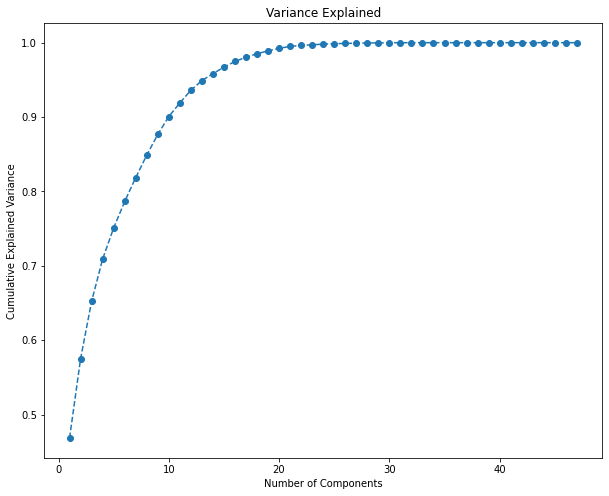

In [15]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data)

pca = PCA()
pca.fit(segmentation_std)

plt.figure(figsize=(10,8))
plt.plot(range(1,48), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [9]:
pca = PCA(n_components=7)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)

data_pca = pd.concat([data.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
data_pca.columns.values[-8: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7']
data = data_pca[['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7']]
data.head()

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8
0,0.806007,-1.024040,-0.419100,0.659688,0.679047,0.597358,0.641064,-0.579230
1,-6.450035,8.324930,3.170275,-2.580710,-2.299908,1.507180,-1.682534,0.460946
2,-0.620222,-0.011159,-0.707689,-0.716362,0.375708,-1.515602,-0.570763,0.809909
3,-0.913083,0.028049,0.462275,-0.810896,0.309745,-1.451247,1.648123,0.502200
4,-0.372244,-1.995764,0.474825,-1.856570,-0.458384,0.513442,-0.849957,0.552148


Text(0, 0.5, 'WCSS')

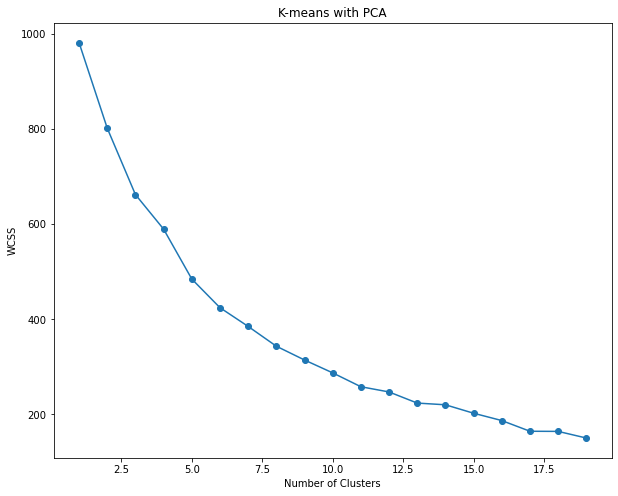

In [16]:
wcss = []
for i in range(1,20): # grid search, assume we have 1 or 2 or 3 ... or 30 clusters/patterns
  kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

plt.figure(figsize=(10,8))
plt.plot(range(1,20), wcss, marker='o', linestyle='-')
plt.title('K-means with PCA')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
# select Number of Clusters that before curve becomes very flat